/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)



Top 10 Association Rules:

                                      antecedents  \
120                          (diet_type_Balanced)   
298         (diet_type_Balanced, meal_name_Other)   
301                          (diet_type_Balanced)   
300  (meal_name_Other, Difficulty Level_Beginner)   
121                   (Difficulty Level_Beginner)   
303                   (Difficulty Level_Beginner)   
147                            (meal_type_Dinner)   
145                         (Workout_Type_Cardio)   
144           (meal_type_Dinner, meal_name_Other)   
3                              (meal_type_Dinner)   

                                      consequents  support  confidence  \
120                   (Difficulty Level_Beginner)  0.05630    0.348176   
298                   (Difficulty Level_Beginner)  0.05630    0.348176   
301  (meal_name_Other, Difficulty Level_Beginner)  0.05630    0.348176   
300                          (diet_type_Balanced)  0.05630    0.169400   
121               

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


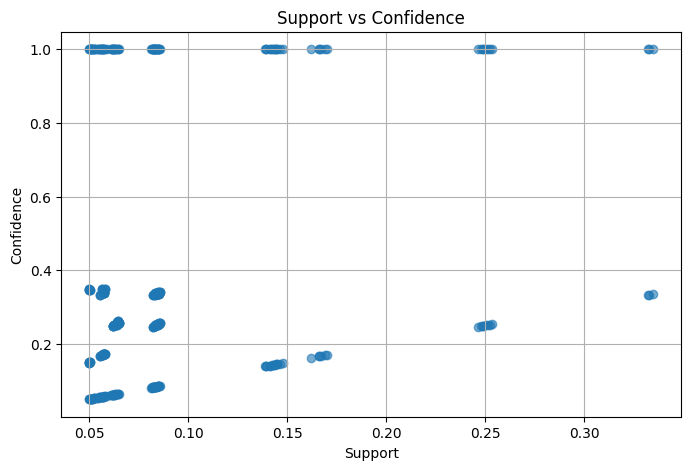

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# --- Market Basket Analysis using Apriori Algorithm on Stress_Dataset.csv ---

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelEncoder

# Step 1: Load dataset
df = pd.read_csv("Stress_Dataset.csv")

# Step 2: Select categorical columns relevant for association analysis
categorical_cols = ['Workout_Type', 'meal_name', 'meal_type', 'diet_type', 'cooking_method',
                    'Benefit', 'Target Muscle Group', 'Equipment Needed',
                    'Difficulty Level', 'Body Part', 'Workout']

# Keep only existing columns
categorical_cols = [col for col in categorical_cols if col in df.columns]
df_subset = df[categorical_cols]

# Step 3: Convert all values to string type
df_subset = df_subset.astype(str)

# Step 4: One-hot encode transactions
# Each row is treated as a "transaction" of item attributes
transactions_encoded = pd.get_dummies(df_subset)

# Step 5: Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transactions_encoded, min_support=0.05, use_colnames=True)

# Step 6: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 7: Sort rules by confidence or lift
rules = rules.sort_values(by="lift", ascending=False)

# Step 8: Display top rules
print("\nTop 10 Association Rules:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Step 9: Optional — visualize top rules (if you want)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()
